# Autompg dabl prediction example

**TODO** add a plot of y vs yhat

In [1]:
import datetime
import pandas as pd
import dabl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
%load_ext watermark
%watermark -p pandas,seaborn,matplotlib,sklearn,dabl -v -m -g

CPython 3.7.6
IPython 7.11.1

pandas 1.0.0
seaborn 0.9.0
matplotlib 3.1.2
sklearn 0.22.1
dabl 0.1.6

compiler   : GCC 7.3.0
system     : Linux
release    : 5.3.0-24-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : 3294f1209b3c9bf101d17e6486c26bdf6673a582


# Load autompg dataset

**NOTE** dabl doesn't seem to like NaN values for the SimpleRegressor

In [3]:
df_raw = pd.read_csv('autompg.csv')
print(f"Original shape {df_raw.shape}")
df = df_raw.dropna()
#df = df_raw
print(f"Shape after dropping NaN: {df.shape}")
df.head()

Original shape (406, 9)
Shape after dropping NaN: (392, 9)


,mpg,cylinders,displacement,hp,weight,acceleration,year,territory,carname
0,18.0,8.0,307.0,130.0,3504.0,12.0,1970,USA,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,1970,USA,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,1970,USA,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,1970,USA,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,1970,USA,ford torino


In [4]:
df = dabl.clean(df, verbose=1)
df.shape

Detected feature types:
3 float, 4 int, 2 object, 0 date, 0 other
Interpreted as:
continuous      5
dirty_float     0
low_card_int    1
categorical     2
date            0
free_string     1
useless         0
dtype: int64


(392, 9)

In [5]:
types = dabl.detect_types(df)
#types.style.highlight_max(color='lightgreen') # note this doesn't work on bools!
types.astype(np.int_).style.highlight_max(color='lightgreen', axis=1)

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
mpg,1,0,0,0,0,0,0
cylinders,0,0,0,1,0,0,0
displacement,1,0,0,0,0,0,0
hp,1,0,0,0,0,0,0
weight,1,0,0,0,0,0,0
acceleration,1,0,0,0,0,0,0
year,0,0,1,0,0,0,0
territory,0,0,0,1,0,0,0
carname,0,0,0,0,0,1,0


In [6]:
target = 'mpg'
columns = list(df.columns)
columns.remove(target)
columns.remove('carname')
columns

['cylinders',
 'displacement',
 'hp',
 'weight',
 'acceleration',
 'year',
 'territory']

In [7]:
X = df[columns]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

sc = dabl.SimpleRegressor().fit(X_train, y_train)

Running DummyRegressor()
r2: -0.008 neg_mean_squared_error: -57.376
=== new best DummyRegressor() (using r2):
r2: -0.008 neg_mean_squared_error: -57.376

Running DecisionTreeRegressor(max_depth=1)
r2: 0.566 neg_mean_squared_error: -24.885
=== new best DecisionTreeRegressor(max_depth=1) (using r2):
r2: 0.566 neg_mean_squared_error: -24.885

Running DecisionTreeRegressor(max_depth=5)
r2: 0.803 neg_mean_squared_error: -11.277
=== new best DecisionTreeRegressor(max_depth=5) (using r2):
r2: 0.803 neg_mean_squared_error: -11.277

Running Ridge(alpha=10)
r2: 0.842 neg_mean_squared_error: -9.033
=== new best Ridge(alpha=10) (using r2):
r2: 0.842 neg_mean_squared_error: -9.033

Running Lasso(alpha=10)
r2: -0.008 neg_mean_squared_error: -57.376

Best model:
Ridge(alpha=10)
Best Scores:
r2: 0.842 neg_mean_squared_error: -9.033


In [11]:
sc.est_

Pipeline(memory=None,
         steps=[('easypreprocessor',
                 EasyPreprocessor(force_imputation=True, scale=True,
                                  types=              continuous  dirty_float  low_card_int  categorical   date  \
cylinders          False        False         False         True  False   
displacement        True        False         False        False  False   
hp                  True        False         False        False  False   
weight              True        False         False        False  False   
acceleration        True        False         False        False  False   
year               False        False          True        False  False   
territory          False        False         False         True  False   

              free_string  useless  
cylinders           False    False  
displacement        False    False  
hp                  False    False  
weight              False    False  
acceleration        False    False  
year     

In [33]:
easy_preprocessor = sc.est_[0]
feature_names = easy_preprocessor.get_feature_names()
feature_names[:3]
#dir(easy_preprocessor)

['displacement', 'hp', 'weight']

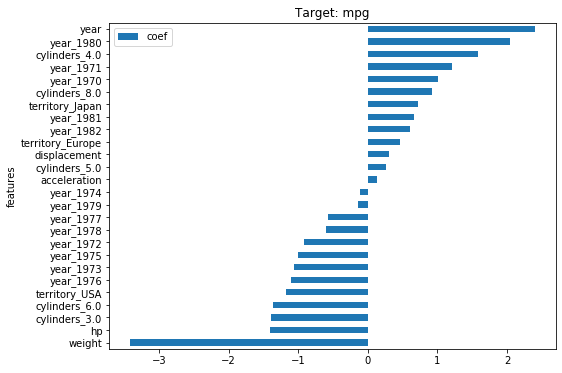

In [32]:
e=sc.est_[1]
fig, ax = plt.subplots(figsize=(8, 6))
ax = pd.DataFrame({'features': feature_names, 'coef': e.coef_}) \
.set_index('features') \
.sort_values('coef').plot(kind='barh', ax=ax);
ax.set_title(f'Target: {target}');

In [8]:
print(f"Notebook completed on {datetime.datetime.now()}")

Notebook completed on 2020-01-30 12:38:51.286081
